<h1 style="text-align: center;">Data Mining Project 2: Classification Analysis</h1>

<p style="text-align:center;">
    呂伯駿<br>
    Q56074085<br>
    NetDB<br>
    National Cheng Kung University<br>
    pclu@netdb.csie.ncku.edu.tw
</p>


## 1. Introduction

本次報告的目的是觀察決策樹算法所產生之規則與正確規則之差異。 報告中透過隨機分類規則合成不同資料，再進行實驗了解不同參數對分類效果的影響。



## 2. Environment

這個部分我將會說明實驗所使用的環境與使用資料集。

### 2.1 System Preferences

實驗環境如下：
- <b>Operating System</b>: macOS High Sierra (10.13.6)
- <b>CPU</b>: 1.3 GHz Intel Core i5
- <b>Memory</b>: 8 GB 1600 MHz DDR3
- <b>Programming Language</b> : Python 3.6.2

由於所用資料集皆僅有1000筆資料，實驗環境記憶體足以符合實驗需求。

### 2.2 Dataset

#### 資料參數
本次實驗採用合成資料(預測分類)，資料集之參數設定如下：

| ID     | Number of Real Column | Number of Fake Column  |  Number of options | Counts | Full Population Index |
| ------------- |:-------------:| -----:|
| 30_r3_f3_c5 | 3 |  3 | 5| 2000|30 |
| 30_r3_f6_c5 | 3 |  6 | 5| 2000|30 |
| 30_r3_f9_c5 | 3 |  9 | 5| 2000|30 |
| 30_r3_f12_c5 | 3 |  12 | 5| 2000|30 |
| 30_r3_f15_c5 | 3 |  15 | 5| 2000|30 |
| 50_r3_f3_c5 | 3 |  3 | 5| 2000| 50|
| 50_r3_f6_c5 | 3 |  6 | 5| 2000| 50 |
| 50_r3_f9_c5 | 3 |  9 | 5| 2000| 50 |
| 50_r3_f12_c5 | 3 |  12 | 5| 2000| 50 |
| 50_r3_f15_c5 | 3 |  15 | 5| 2000| 50 |

#### 欄位說明：
- Number of Real Column: 對分類結果有影響之欄位數目
- Number of Fake Column: 對分類結果沒有影響之欄位數目
- Number of options: 每項欄位可能之數值種類
- Counts: 該資料集總資料筆數
- Full Population Index: 該資料集資料佔分類母體達 100% 時之資料百分比


#### 分類說明：
所預測之欄位為分類，有兩種分類 "A" & "B"。 <br>

以 50_r3_f3_c5 資料集為例，會影響分類之欄位數目為3，每種欄位有 5 種可能之數值，因此該資料集可能影響分類之規則有 5^3 = 125 種，而假欄位的數目為3，因此所有可能的資料有 15625 種，我們僅sample 出 2000筆資料，佔所有可能之 12.8%。<br>

其 Full Population Index 為 50，表示資料取到第1000筆時(50%資料)，125種分類規則已全數出現於資料集中，後續1000筆資料，在前三個有效欄位不會再出現新的組合。

#### 資料範例

資料範例如下： 其中 F0~F2 為有效欄位，F3~F5為無效欄位，y為分類。

In [20]:
import pandas as pd
data = pd.read_csv('data/30/r3_f3_c5/training.csv')
data.head()

,F0,F1,F2,F3,F4,F5,y
0,0,1,4,1,4,3,A
1,0,3,2,1,2,4,A
2,0,1,1,3,3,1,A
3,0,4,3,2,2,4,B
4,1,2,3,2,3,1,A


該資料集之資料index佔母體之趨勢變化如下。表示到第 600 筆資料時，125種可能規則已全數出現

In [26]:
df = pd.DataFrame([['0.56', '0.8', '0.928', '0.968', '0.992', '1','1','1','1','1','1','1','1','1','1','1','1','1','1']],
 index=['0'],
 columns=['5', '10','15','20','25','30','35','40','45','50','55','60','65','70','75','80','85','90','95',])
df.head()

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0.56,0.8,0.928,0.968,0.992,1,1,1,1,1,1,1,1,1,1,1,1,1,1



## 3. Implementation

### 3.1 Data generation

資料產生分為三個階段，(1)規則樹的產生，(2)將規則樹轉化為規則陣列，(3)以及根據該規則陣列產生資料集。

若有三個欄位5種數值，則會產生 3 層，最終 125 leaves 之樹

若僅有兩個欄位，每個欄位兩種數值，則為基本二元樹，產生之樹呈現上如下圖：

![](https://i.imgur.com/kHqxlbp.png)

若第一個欄位數值為 0 ，第二個欄位數值為 1，則分類為 B


### 3.2 Classification

由於目的是比較算法產生之分類規則與實際制定之分類規則上之差異，我們需採用可解釋結果之模型，因此分類上使用 scikit learn Package 之 Decision Tree 算法進行分類。


## 4. Analysis

實驗將比較改變不同 training data 數目，不同無效欄位數目，以及不同資料母體趨勢 (Full Population Index)時，其準確度，決策樹之深度，node 數目之差異。

Testing Data 固定採用 100筆資料。

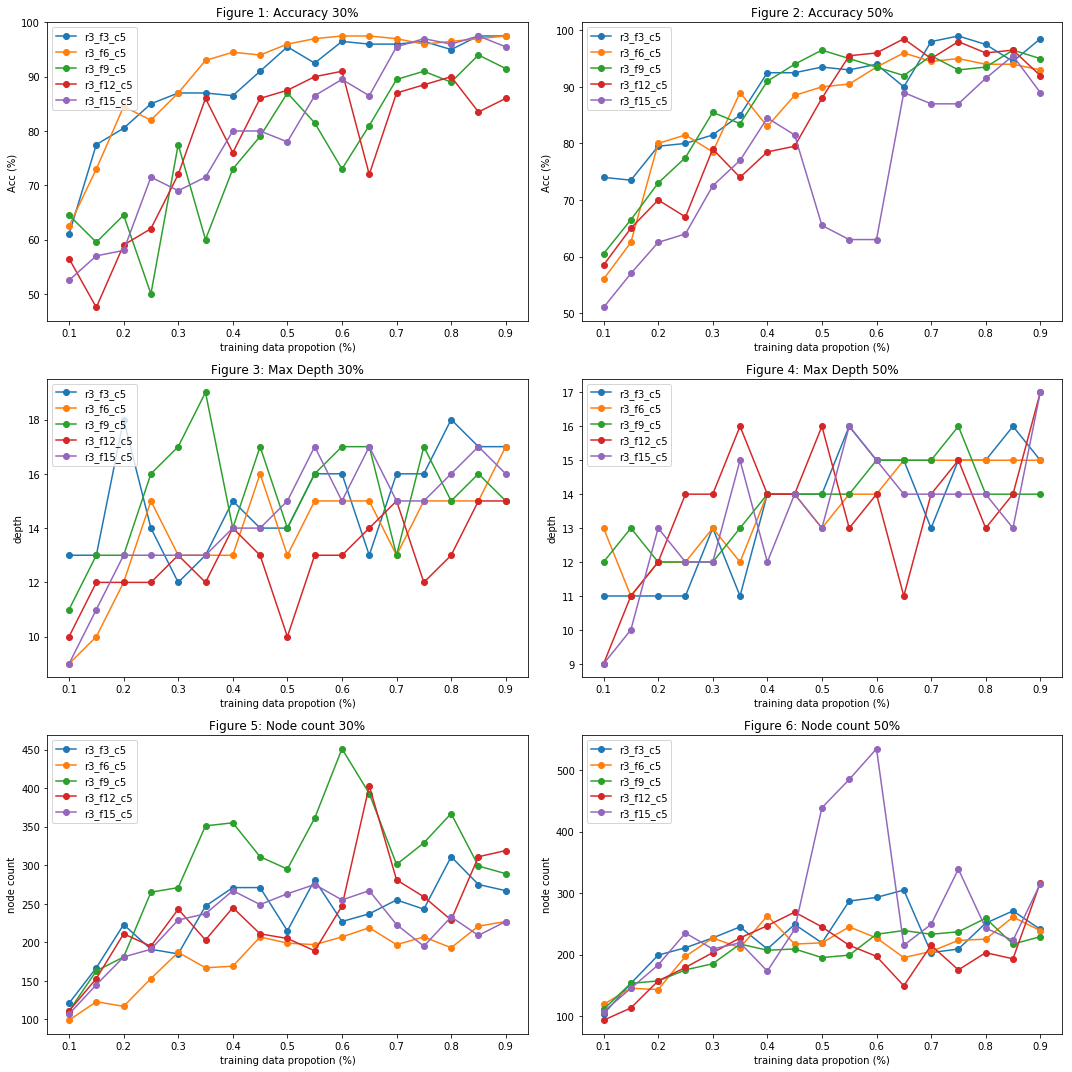

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

acc_30 = pd.read_csv('data/30/acc.csv')
depth_30 = pd.read_csv('data/30/depth.csv')
node_30 = pd.read_csv('data/30/node.csv')

acc_50 = pd.read_csv('data/50/acc.csv')
depth_50 = pd.read_csv('data/50/depth.csv')
node_50 = pd.read_csv('data/50/node.csv')


plt.figure(figsize=(15, 15))


def plot_data(index, data, y_label, title):


    plt.subplot(index)
    x = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
    y_1 = data.values[0][1:]
    y_2 = data.values[1][1:]
    y_3 = data.values[2][1:]
    y_4 = data.values[3][1:]
    y_5 = data.values[4][1:]

    plt.plot(x, y_1, 'o-')
    plt.plot(x, y_2, 'o-')
    plt.plot(x, y_3, 'o-')
    plt.plot(x, y_4, 'o-')
    plt.plot(x, y_5, 'o-')
    plt.xlabel('training data propotion (%)')
    plt.ylabel(y_label)
    plt.legend(["r3_f3_c5", "r3_f6_c5", "r3_f9_c5", "r3_f12_c5", "r3_f15_c5"], loc=2);
    plt.title(title);

    
plot_data(321, acc_30, 'Acc (%)', 'Figure 1: Accuracy 30%')
plot_data(322, acc_50, 'Acc (%)', 'Figure 2: Accuracy 50%')

plot_data(323, depth_30, 'depth', 'Figure 3: Max Depth 30%')
plot_data(324, depth_50, 'depth', 'Figure 4: Max Depth 50%')

plot_data(325, node_30, 'node count', 'Figure 5: Node count 30%')
plot_data(326, node_50, 'node count', 'Figure 6: Node count 50%')

plt.tight_layout()
plt.show()

### 4.1 Accuracy


### 4.2 Max Depth


### 4.3 Node Count





## 5. Conclusion

本次實驗由於無效欄位的產生是隨機進行，因此無法排除在產生無效欄位的過程中其自然產生出有效規則的可能性，

